In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [18]:
data_points = np.array([18, 22, 25, 27, 42, 43]).reshape(-1, 1)

In [19]:
def compute_proximity(data):
    n = len(data)
    mat = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1, n):
            mat[i, j] = abs(data[i]-data[j])
            mat[j, i] = mat[i, j]
    
    return mat

In [20]:
def print_proximity(matrix, iteration):
    print(f'\nProximity Matrix at iteration : {iteration}')
    print(matrix)

In [24]:
def single_linkage(data):
    clusters = [[point] for point in data]
    mat = compute_proximity(data)
    n = len(clusters)

    merges = []
    distances = []
    cluster_sizes = [1] * len(data_points)

    while len(clusters)>1:
        min_dist = np.inf
        min_i, min_j = -1, -1
        for i in range(n):
            for j in range(i+1, n):
                if mat[i, j]<min_dist and mat[i, j]>0:
                    min_dist = mat[i, j]
                    min_i, min_j = i, j

        merges.append((min_i, min_j))
        distances.append(min_dist)

        new_cluster = clusters[min_i]+clusters[min_j]
        new_cluster_size = cluster_sizes[min_i] + cluster_sizes[min_j]
        clusters[min_i] = new_cluster
        cluster_sizes[min_i] = new_cluster_size

        clusters.pop(min_j)
        cluster_sizes.pop(min_j)

        mat = np.delete(mat, min_j, axis=0)
        mat = np.delete(mat, min_j, axis=1)

        for k in range(len(clusters)):
            if k!=min_i:
                new_distance = min([abs(p1-p2) for p1 in new_cluster for p2 in clusters[k]])
                mat[min_i, k] = new_distance
                mat[k, min_i] = new_distance
        
        print_proximity(mat, n-len(clusters))

        n-=1


Proximity Matrix at iteration : 1
[[ 0.  4.  7.  9. 24.]
 [ 4.  0.  3.  5. 20.]
 [ 7.  3.  0.  2. 17.]
 [ 9.  5.  2.  0. 15.]
 [24. 20. 17. 15.  0.]]

Proximity Matrix at iteration : 1
[[ 0.  4.  7. 24.]
 [ 4.  0.  3. 20.]
 [ 7.  3.  0. 15.]
 [24. 20. 15.  0.]]

Proximity Matrix at iteration : 1
[[ 0.  4. 24.]
 [ 4.  0. 15.]
 [24. 15.  0.]]

Proximity Matrix at iteration : 1
[[ 0. 15.]
 [15.  0.]]

Proximity Matrix at iteration : 1
[[0.]]


C:\Users\ROG\AppData\Local\Temp\ipykernel_34460\427359707.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mat[i, j] = abs(data[i]-data[j])
C:\Users\ROG\AppData\Local\Temp\ipykernel_34460\3476519745.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mat[min_i, k] = new_distance
C:\Users\ROG\AppData\Local\Temp\ipykernel_34460\3476519745.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mat[k, min_i] = new_distance


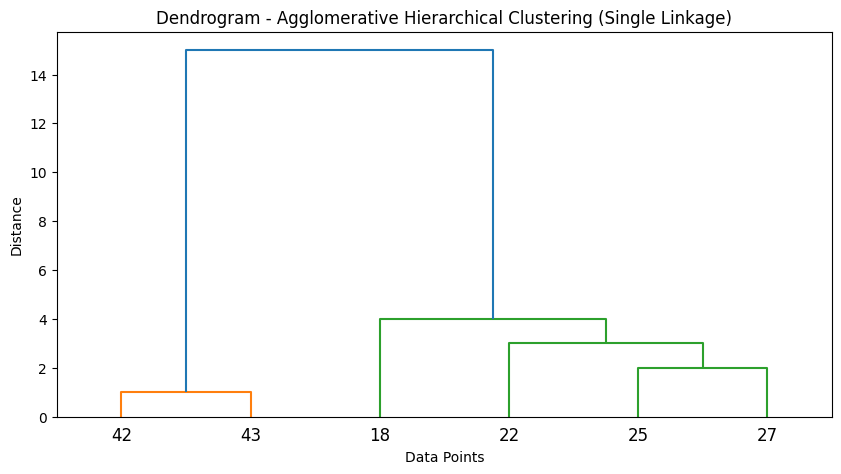

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot the dendrogram using scipy
single_linkage(data_points)
linkage_matrix = linkage(data_points, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=[str(x) for x in data_points.flatten()])
plt.title('Dendrogram - Agglomerative Hierarchical Clustering (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()